### How the datasets related to Two-Pot system's objective

- **Adult Census Income Dataset:**
  This dataset provides socio-economic features (such as age, work class, education level, marital status, hours worked per week) that are highly relevant to predicting whether an employee will withdraw from the Accessible Pot before retirement. Socio-economic factors often influence financial decisions.

- **Global Inflation Dataset:**
  Inflation affects the purchasing power and long-term growth of the Locked Pot. Including inflation data (specific to South Africa) will help forecast the growth of the Locked Pot over time.


In [280]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer


In [281]:
# Adult Census Income dataset
adult_census_df = pd.read_csv('C:/Users/notha/TP_Exam/adult.csv')

In [282]:
# Global Inflation dataset
global_inflation_df = pd.read_csv('C:/Users/notha/TP_Exam/global_inflation_data.csv')


In [283]:
# View the first few rows of each dataset
print(adult_census_df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [284]:
print(global_inflation_df.head())

  country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  2024  
0   5.44   5.

In [285]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [286]:
global_inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            140 non-null    float64
 3   1981            144 non-null    float64
 4   1982            145 non-null    float64
 5   1983            145 non-null    float64
 6   1984            145 non-null    float64
 7   1985            145 non-null    float64
 8   1986            145 non-null    float64
 9   1987            147 non-null    float64
 10  1988            147 non-null    float64
 11  1989            147 non-null    float64
 12  1990            150 non-null    float64
 13  1991            155 non-null    float64
 14  1992            158 non-null    float64
 15  1993            169 non-null    float64
 16  1994            171 non-null    float64
 17  1995            172 non-null    flo

In [287]:
print("\nColumns in Adult Census Income Dataset:")
print(adult_census_df.columns)



Columns in Adult Census Income Dataset:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


- **Adult Census Dataset:** 
We’ll use mode or median imputation for missing values.

In [288]:
# Check for missing values
print("\nMissing values in Adult Census Income Dataset:")
print(adult_census_df.isnull().sum())



Missing values in Adult Census Income Dataset:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [289]:
# Impute missing values
# Assuming 'age', 'hours.per.week' are numerical, and others are categorical
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [290]:
# Apply imputers to relevant columns and flatten to 1D
adult_census_df['age'] = imputer_num.fit_transform(adult_census_df[['age']]).ravel()
adult_census_df['hours.per.week'] = imputer_num.fit_transform(adult_census_df[['hours.per.week']]).ravel()
adult_census_df['workclass'] = imputer_cat.fit_transform(adult_census_df[['workclass']]).ravel()
adult_census_df['occupation'] = imputer_cat.fit_transform(adult_census_df[['occupation']]).ravel()

In [291]:
# Check to ensure no missing values remain
print("\nMissing values after imputation:")
print(adult_census_df.isnull().sum())


Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


- **Global Inflation Dataset:** We'll handle missing inflation values using interpolation for missing years.

In [292]:
# Check for missing values in global inflation data
print("\nMissing values in Global Inflation Dataset:")
print(global_inflation_df.isnull().sum())

# Interpolate missing inflation data
global_inflation_df.interpolate(method='linear', inplace=True)

# Check if there are still missing values
print("\nMissing values in Global Inflation Dataset after interpolation:")
print(global_inflation_df.isnull().sum())



Missing values in Global Inflation Dataset:
country_name       0
indicator_name     0
1980              56
1981              52
1982              51
1983              51
1984              51
1985              51
1986              51
1987              49
1988              49
1989              49
1990              46
1991              41
1992              38
1993              27
1994              25
1995              24
1996              20
1997              17
1998              15
1999              14
2000              13
2001               9
2002               7
2003               6
2004               5
2005               3
2006               3
2007               3
2008               3
2009               3
2010               3
2011               4
2012               3
2013               2
2014               2
2015               2
2016               2
2017               1
2018               1
2019               1
2020               2
2021               2
2022               2
2023      

C:\Users\notha\AppData\Local\Temp\ipykernel_16332\34889907.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  global_inflation_df.interpolate(method='linear', inplace=True)


In [293]:
print(global_inflation_df.columns)

Index(['country_name', 'indicator_name', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


#### Categorical Encoding
For the Adult Census Income Dataset, we will convert categorical variables into numerical representations using LabelEncoder or one-hot encoding.

In [294]:
# List of categorical features
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Apply Label Encoding to each categorical feature
for col in categorical_features:
    le = LabelEncoder()
    adult_census_df[col] = le.fit_transform(adult_census_df[col].astype(str))  # Ensure that all values are treated as strings

# Now separate your features and target
X = adult_census_df.drop('income', axis=1)
y = adult_census_df['income']

We will scale numerical columns like age and hours_per_week to ensure they have a uniform range.

In [295]:
# Standardize numerical features
scaler = StandardScaler()
adult_census_df[['age', 'hours.per.week']] = scaler.fit_transform(adult_census_df[['age', 'hours.per.week']])

# Check the results
print("\nStandardized Age and Hours per Week:")
print(adult_census_df[['age', 'hours.per.week']].head())




Standardized Age and Hours per Week:
        age  hours.per.week
0  3.769612       -0.035429
1  3.183112       -1.817204
2  2.010110       -0.035429
3  1.130359       -0.035429
4  0.177296       -0.035429


In [296]:
# Convert income to a binary classification (0 for <=50K, 1 for >50K)
adult_census_df['income'] = adult_census_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [297]:
# Feature engineering: create income-to-hours ratio (ignore income column for ratio)
adult_census_df['income.to.hours'] = adult_census_df['income'] / adult_census_df['hours.per.week']


#### Filtering and Reshaping the Global Inflation Data
Since we are focused on South Africa’s inflation data, we’ll filter and reshape the dataset to only include relevant rows.

In [298]:
# Filter South Africa's inflation data
sa_inflation_df = global_inflation_df[global_inflation_df['country_name'] == 'South Africa']

# Reshape the dataframe to have one row per year
sa_inflation_df = sa_inflation_df.melt(id_vars=['country_name', 'indicator_name'], 
                                       var_name='year', value_name='inflation_rate')

# Convert year to integer
sa_inflation_df['year'] = sa_inflation_df['year'].astype(int)

# Check the reshaped dataframe
print("\nReshaped South Africa Inflation Data:")
print(sa_inflation_df.head())



Reshaped South Africa Inflation Data:
   country_name                                   indicator_name  year  \
0  South Africa  Annual average inflation (consumer prices) rate  1980   
1  South Africa  Annual average inflation (consumer prices) rate  1981   
2  South Africa  Annual average inflation (consumer prices) rate  1982   
3  South Africa  Annual average inflation (consumer prices) rate  1983   
4  South Africa  Annual average inflation (consumer prices) rate  1984   

   inflation_rate  
0            14.2  
1            15.3  
2            13.7  
3            12.8  
4            11.3  


#### Data Preparation for Machine Learning
Finally, we'll prepare the data for model training by splitting the datasets into training and test sets.

In [299]:
# Split Adult Census Income dataset into features and labels
X = adult_census_df.drop(columns=['income'])
y = adult_census_df['income']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("\nShapes of training and testing datasets:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes of training and testing datasets:
(26048, 15) (6513, 15) (26048,) (6513,)


In [300]:
# Fit a classification model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [301]:
# Make predictions
y_pred = model.predict(X_test)

In [302]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4976
           1       1.00      1.00      1.00      1537

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513


Confusion Matrix:
[[4976    0]
 [   0 1537]]

ROC AUC Score:
1.0


## Forecasting (Long-Term Savings Growth)
We will use Facebook Prophet time series forecasting

In [303]:
# We'll assume you want to forecast inflation for a specific country
country_name = 'South Africa'  # Change to the desired country
country_data = global_inflation_df[global_inflation_df['country_name'] == country_name]


In [304]:
# Melt the DataFrame to long format
country_data = country_data.melt(id_vars=['country_name', 'indicator_name'], 
                                  var_name='year', 
                                  value_name='inflation_rate')

In [305]:
# Convert 'year' to datetime
country_data['year'] = pd.to_datetime(country_data['year'], format='%Y')

In [306]:
# Prepare the data for Prophet
prophet_data = country_data[['year', 'inflation_rate']].rename(columns={'year': 'ds', 'inflation_rate': 'y'})


In [307]:
# Initialize the Prophet model
model = Prophet()

In [308]:
# Fit the model
model.fit(prophet_data)

13:06:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:45 - cmdstanpy - INFO - Chain [1] done processing


In [309]:
# Create future dataframe for the next few years
future = model.make_future_dataframe(periods=5, freq='Y')  # Forecast for the next 5 years


C:\Users\notha\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [310]:
# Make predictions
forecast = model.predict(future)

C:\Users\notha\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\notha\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


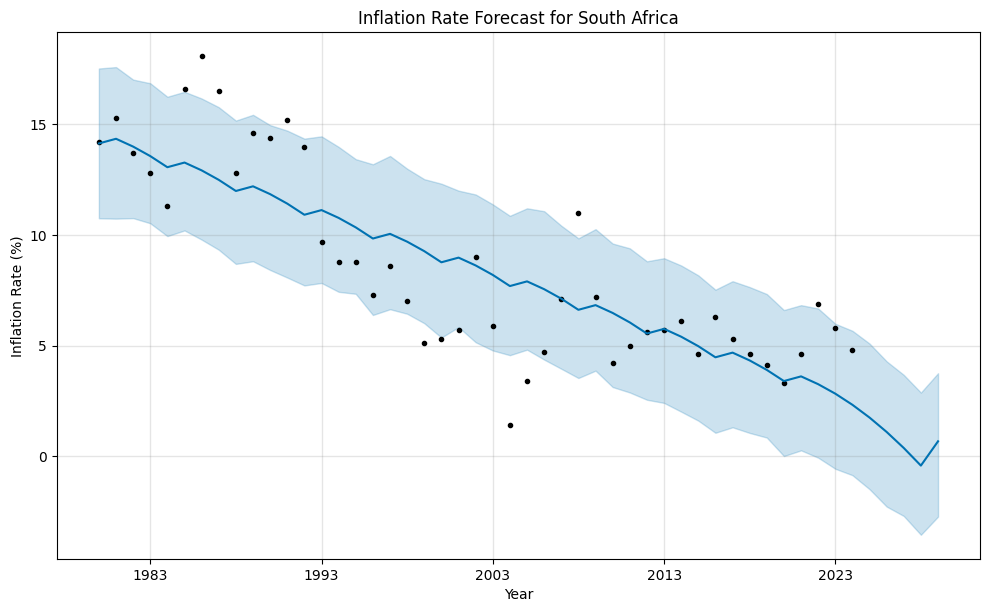

In [311]:
# Plot the results
model.plot(forecast)
plt.title(f'Inflation Rate Forecast for {country_name}')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.show()

## Sentimental Analysis (Employee Feedback)

### Data Collection
Collect employee feedback data from surveys, interviews, or any other relevant sources. This data should be in textual form, capturing employees' opinions, feelings, and suggestions about the Two-Pot system.

### Text Preprocessing
Clean the collected text data to prepare it for analysis. 
Tokenization: Breaking down text into individual words or tokens.
Stopword Removal: Removing common words that do not carry much meaning (e.g., "and," "the").
Stemming and Lemmatization: Reducing words to their root forms (e.g., "running" -> "run").

### Feature Extraction
Transform the preprocessed text into a numerical format that can be analyzed. 
Bag of Words: Representing text as a frequency count of words.
Term Frequency-Inverse Document Frequency (TF-IDF): Weighing the importance of words based on their frequency in the feedback and across all documents.

### Modeling
Applying machine learning or deep learning models to the processed text to perform tasks like classification, translation, or summarization.

### Postprocessing
Generating human-readable outputs, such as generating sentences or extracting key information.

### Categorization
Positive Sentiment: Feedback that reflects satisfaction or approval of the Two-Pot system.
Negative Sentiment: Feedback that indicates dissatisfaction or concerns about the system.
Neutral Sentiment: Feedback that is factual or does not express a strong opinion.
